In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
df=pd.read_csv('D:/Semester 8/NLP/IA/sentimentanalyis_1-main/Labelling reviews/labelled_reviews2.csv')

train, test = train_test_split(df, test_size=0.2, random_state=25)

In [3]:
print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 9991
No. of testing examples: 2498


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# extract the labels from the train data
y = train.Sentiment.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.new_reviews.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

we will use Multinomial Naive Bayes Classifier

In [7]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(x_train_vec, y_train) 
predicted_naive = model_naive.predict(x_test_vec)

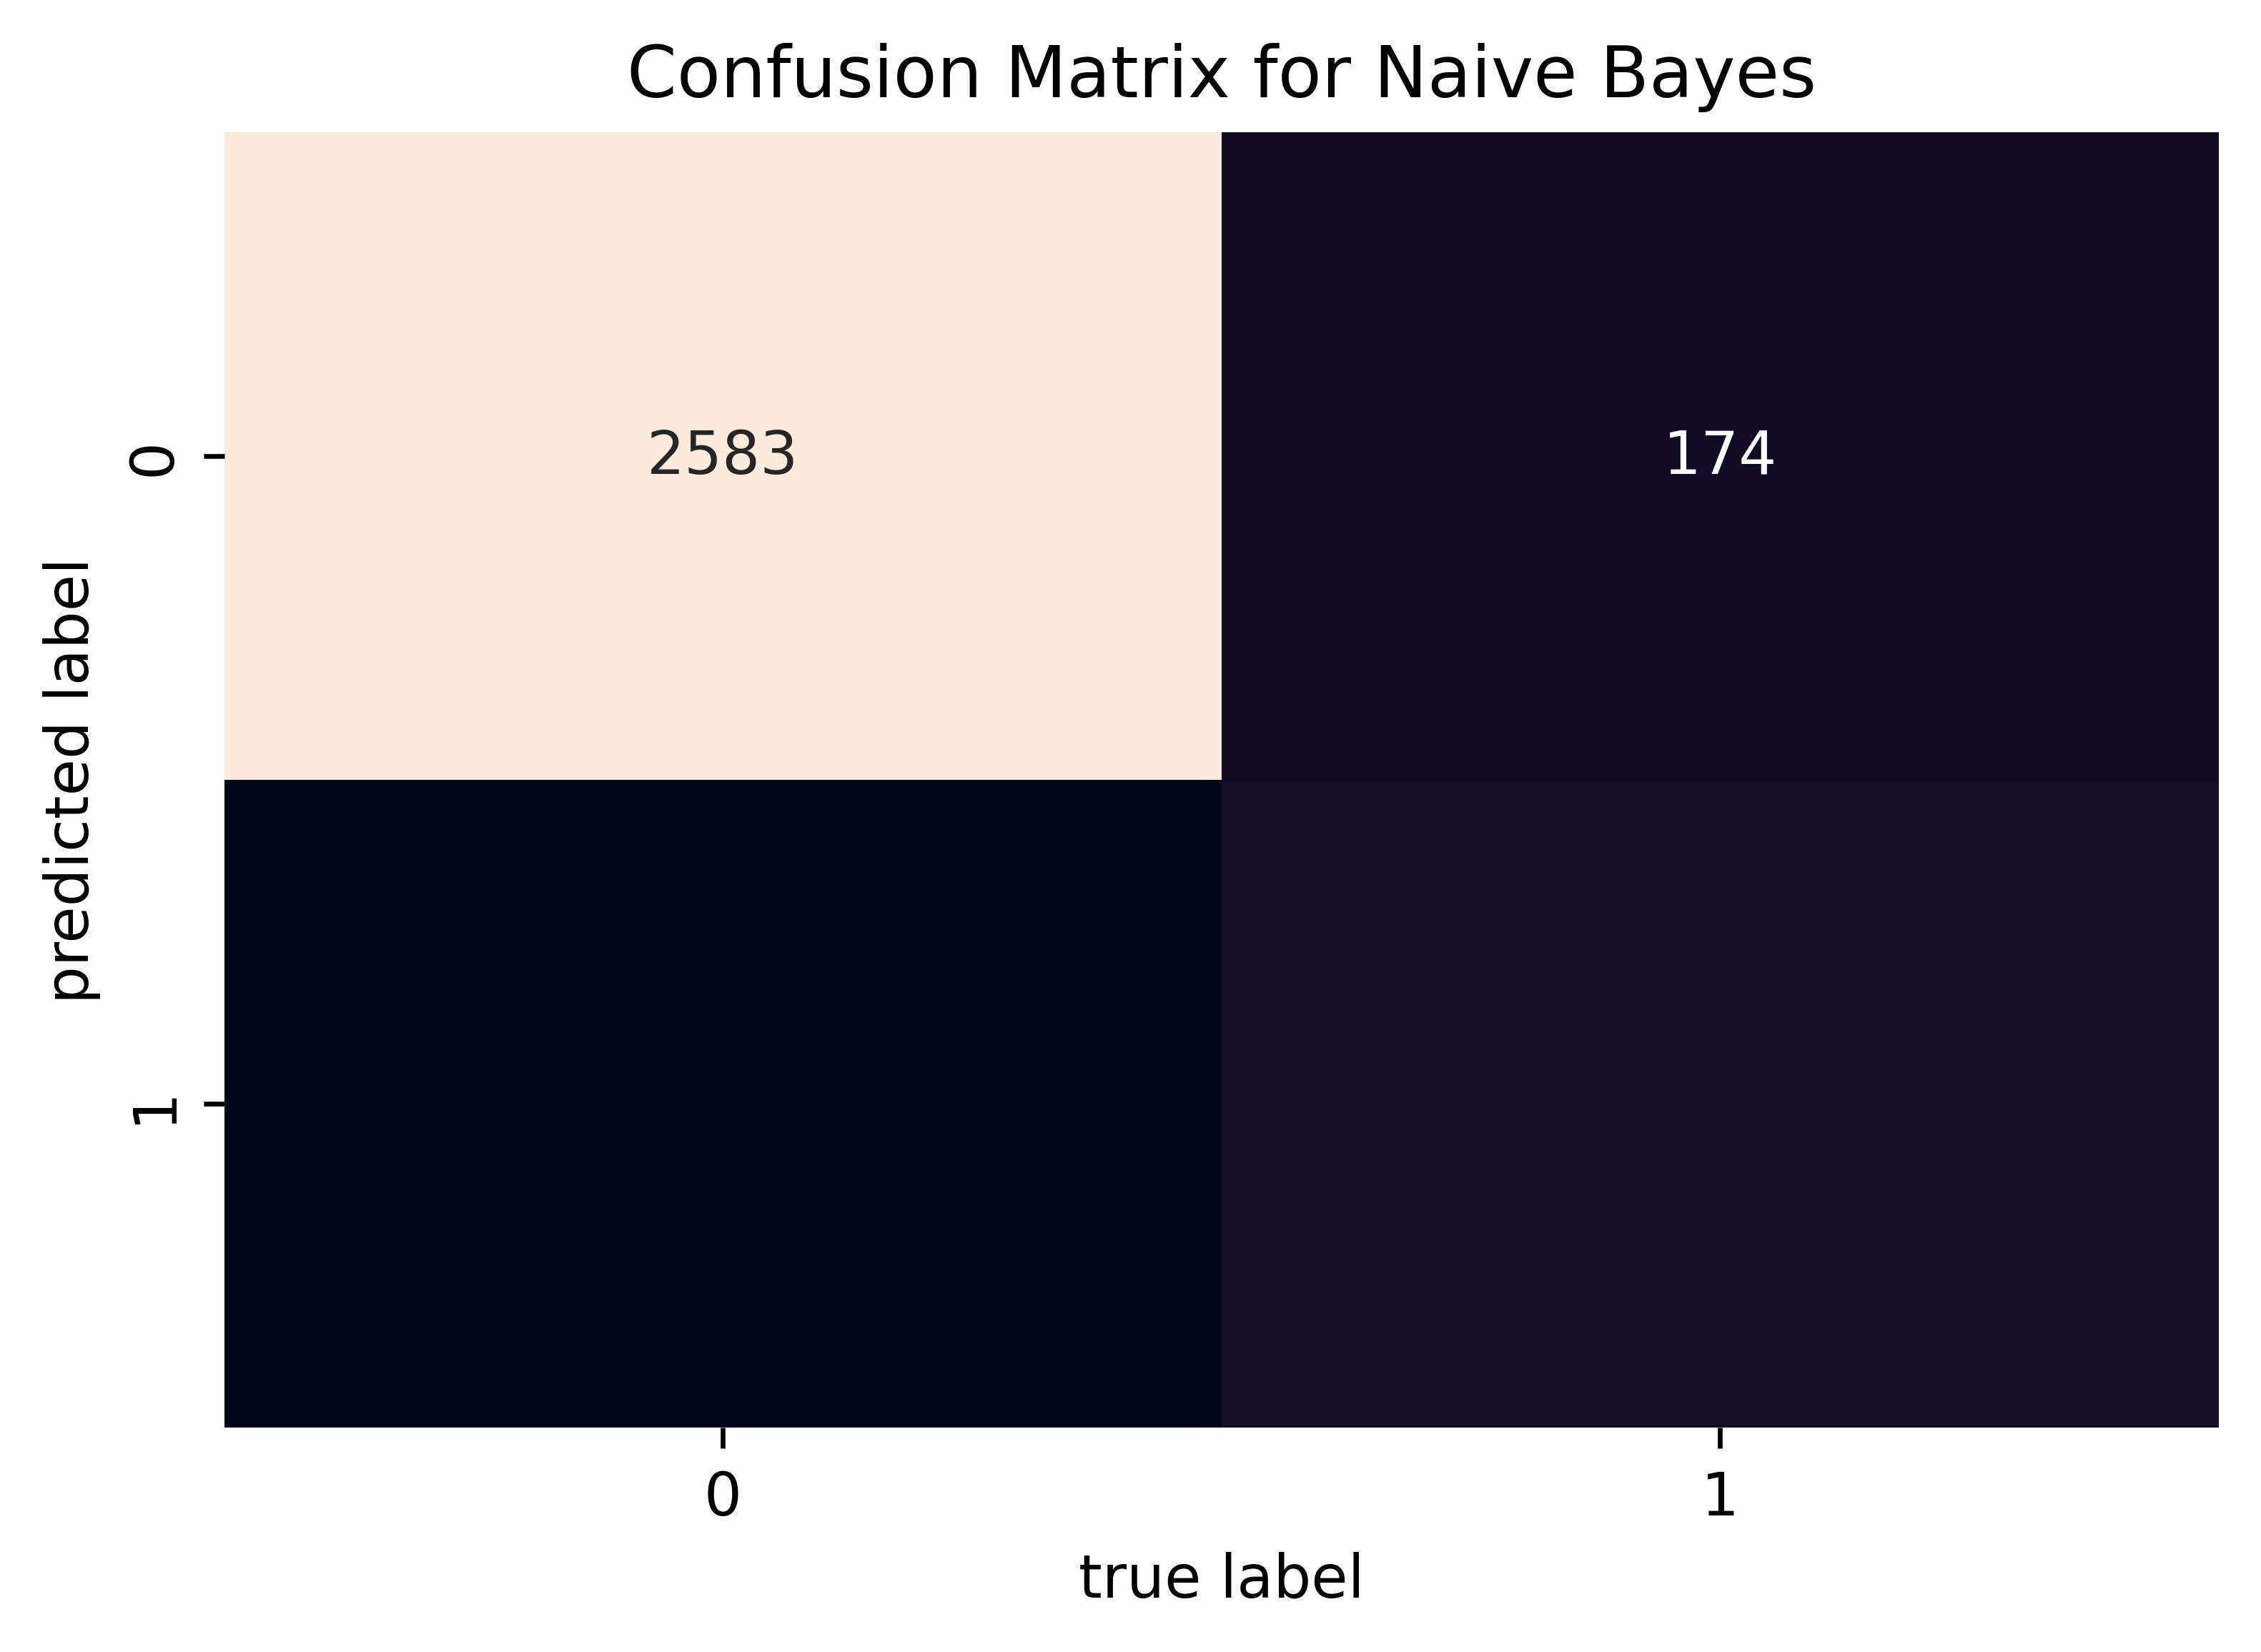

In [8]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [9]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(y_test,predicted_naive)
print("Accuracy with Naive-bayes: ",score_naive*100,"%")

Accuracy with Naive-bayes:  92.16144096064043 %


In [10]:
import statsmodels.api as sm

ols = sm.OLS(y_test,predicted_naive)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.380
Model:                            OLS   Adj. R-squared (uncentered):              0.380
Method:                 Least Squares   F-statistic:                              1835.
Date:                Thu, 28 Mar 2024   Prob (F-statistic):                   3.24e-313
Time:                        16:07:24   Log-Likelihood:                         -335.48
No. Observations:                2998   AIC:                                      673.0
Df Residuals:                    2997   BIC:                                      679.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7469      0.017     42.838      0.000       0.713       0.781
==============================================================================
Omnibus:                     1395.529   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10392.059
Skew:                           2.067   Prob(JB):                         0.00
Kurtosis:                      11.130   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import pickle

In [12]:
file="naivemodel.pkl"
fileobj=open(file,'wb')
pickle.dump(MultinomialNB,fileobj)
fileobj.close()

In [13]:
file="naivemodel.pkl"
fileobj=open(file,'rb')
mp=pickle.load(fileobj)
print(mp)

<class 'sklearn.naive_bayes.MultinomialNB'>


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample input tweet
s = input("Enter tweet: ")
tex = [s]

# Initializing the CountVectorizer
vectorizer = CountVectorizer()

# Tokenize and create the document-term matrix
document_term_matrix = vectorizer.fit_transform(tex)

# Get feature names
try:
    # For scikit-learn version 0.24.0 or later
    feature_names = vectorizer.get_feature_names_out()
except AttributeError:
    # For older versions
    feature_names = vectorizer.get_feature_names()

# Check the result
pd.DataFrame(document_term_matrix.toarray(), columns=feature_names)
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
hi = vectorizer.transform(tex)
x_test_vec = vectorizer.transform(x_test)
y_pred = model_naive.predict(hi)
print(y_pred)

[0]
